<a href="https://colab.research.google.com/github/Davis-Tony/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/TonyDavis_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [2]:
#imports
import math
import numpy as np
import pandas as pd

In [4]:
#Calculating the mean
sales_mean = sum(sales)/len(sales)
sales_mean

3052.714285714286

In [6]:
#Calculating the variance

#Writing a function
def subtract_mean(number):
    return number-sales_mean

#Applying the function to the list
distances = list(map(subtract_mean, sales))

#Square and sum of the distances
squared_distances = list(map(lambda x: x**2, distances))

#How long is our list?
list_length=len(squared_distances)

#Finding Variance
variance_sales=sum(squared_distances)/list_length
variance_sales

183761.06122448976

In [7]:
#Finding the standard deviation
math.sqrt(variance_sales)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [8]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [9]:
#Finding covariance
pd.DataFrame(np.cov(sales, customers))

,0,1
0,214387.904762,7604.357143
1,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
#Creating DataFrame of sales and customers
store = pd.DataFrame({'sales':sales,'customers':customers})
store

In [13]:
#Calculating the standard dev of both columns
std_s = store['sales'].std()
std_c = store['customers'].std()
print(std_s, '\n', std_c)

463.0204150595357 
 17.057326313123664


In [14]:
#Calculating covariance
cov_sc = store['sales'].cov(store['customers'])
cov_sc

7604.357142857142

In [16]:
#Setting the denominator
denom = std_s * std_c
denom

7897.890309308459

In [18]:
#Calculate correlation
corr_sc = cov_sc/denom
corr_sc

0.9628339778148909

In [19]:
#Checking work
store.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [20]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

In [36]:
#Reading in data
titanic = pd.read_csv(url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [37]:
#Dropping 'unnamed' column
titanic = titanic.drop(titanic.columns[[0]], axis=1)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [38]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [39]:
#Covariance Matrix
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [40]:
#Correlation Matrix
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
#A synonym for orthogonal is perpendicular

In [41]:
# import
import matplotlib.pyplot as plt

In [42]:
#Making a couple of vectors
vector_1 = [3,3]
vector_2 = [2,-2]

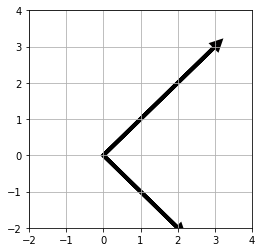

In [44]:
# Set up the figure so that x and y axes are symmetrical.

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Plot the vectors
for vect in [vector_1, vector_2]:
  plt.arrow(0,0., vect[0], vect[1],
            head_width=.2,
            head_length=.2,
            linewidth=4)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [64]:
a = np.array(([-5],[3],[7]))
b = np.array([[6],[-8],[2]])

np.multiply(a,b)

array([[-30],
       [-24],
       [ 14]])

In [ ]:
#Not Orthogonal becuase the product is not 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [80]:
c=[2,-15,6,20]

In [74]:
np.linalg.norm(c)

25.787593916455254

In [81]:
np.dot(c,c)

665

In [93]:
c2=np.array([[2,-15,6,20]])
c2=pd.DataFrame(c2.T)

In [ ]:
np.multiply(c2,c)

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [100]:
f=[4,12,11,9,2]
f_hat = f/np.linalg.norm(f)
print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [101]:
# Linearly dependent vectors
vector_1 = [-.8, 1.3]
vector_2 = np.multiply(vector_1, 2)
print(vector_1, '\n', vector_2)

[-0.8, 1.3] 
 [-1.6  2.6]


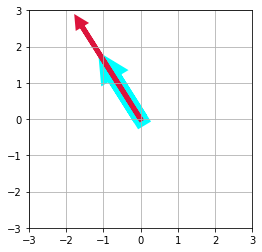

In [102]:
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [107]:
# Linearly independent vectors, not orthogonal
vector_1 = np.random.randint(low=-3, high=3, size=2)
vector_2 = np.random.randint(low=-3, high=3, size=2)
print(vector_1, '\n', vector_2)

[-2  1] 
 [-2  2]


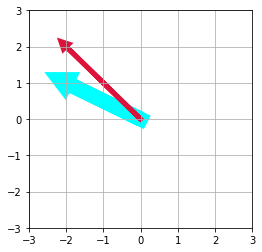

In [108]:
# Set up the grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors
for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [110]:
g=np.array([1,2])
h=np.array([4,8])

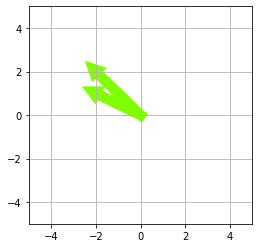

In [111]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Display
for myvect in [vector_1, vector_2]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='chartreuse')

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [112]:
l=[1,2,3]
m=[-1,0,7]
n=[4,8,2]

In [115]:
muchos_combos=[]
for (x,y,z) in [l,m,n]:
    linear_combo = np.multiply(l, x) + np.multiply(m, y) + np.multiply(n,z)
    muchos_combos.append(linear_combo)
print(muchos_combos)

[array([11, 26, 23]), array([27, 54, 11]), array([ 4, 24, 72])]


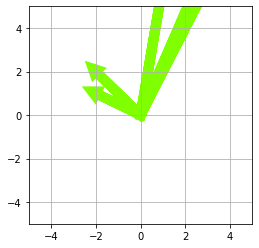

In [116]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Display
for myvect in [vector_1, vector_2, linear_combo]+muchos_combos:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='chartreuse')

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



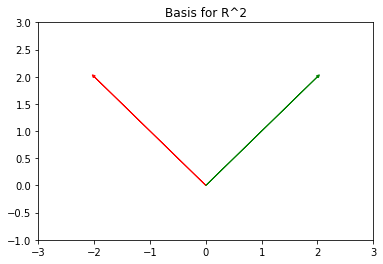

In [117]:
# find basis vectors in 2-d
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [118]:
P = ([[1,2,3],[-1,0,7],[4,8,2]])

In [119]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank means the number of dimensions in the output of a matrix that's used for linear transformation.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [121]:
#Two vectors
v=[1,3]
w=[-1,2]

In [124]:
#Dot products
v_dot_w = np.dot(v,w)
v_dot_v = np.dot(v,v)

In [125]:
#Projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


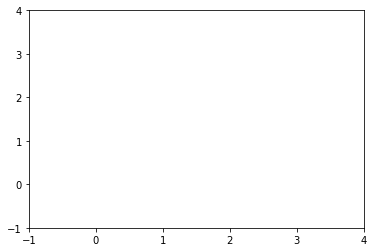

In [126]:
# Plot a line
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()

In [127]:
# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


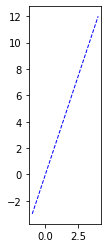

In [129]:
# Axis Bounds
# plt.xlim(-2,4)          
# plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1);

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

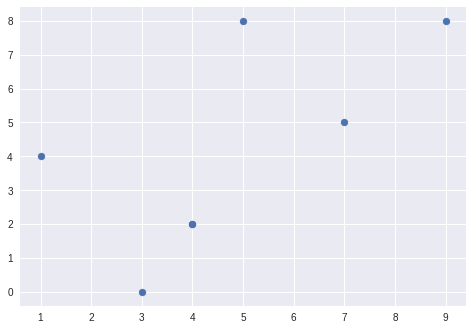

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()